<div class="row">
  <div class="col-xs-6 col-md-3">
      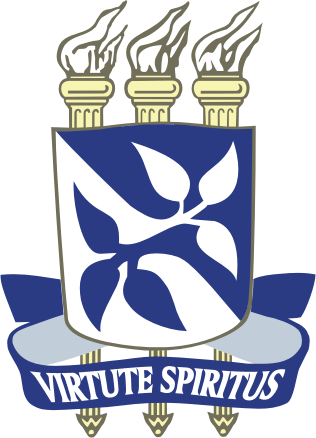</img>
  </div>
  <div class="col-xs-6 col-md-5">
        <p> <b>Universidade Federal da Bahia <br/>
            Escola Politécnica <br/>
            Departamento de Engenharia Elétrica e de Computação <br/>
            Orientador: Prof. Dr. Antônio C. Lopes <br/>
            Aluno: Gabriel Mendes </b>
        </p>
  </div>
</div>

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import math
from scipy.signal import butter, buttord, lfilter, freqs

# Projeto do Filtro Butterworth

### Especificações do Filtro

In [2]:
f_sample = 96000 # frequência de amostragem (Hz)
f_pass = 8000 # frequência de corte da banda passante (Hz)
f_stop = 44100 # frequência de corte da banda de rejeição (Hz)
f_nyquist = f_sample/2 # frequência de Nyquist (Hz)
wp = 2*(np.pi)*f_pass # frequência de corte da banda passante (rad/s)   
ws = 2*(np.pi)*f_stop # frequência de corte da banda de rejeição (rad/s)    
A_pass = 0.5 # atenuação máxima na banda de passagem (dB)
A_stop = 70 # atenuação mínima na banda de rejeição (dB) 

### Cálculo do Filtro

In [3]:
N, Wn = buttord(wp, ws, A_pass, A_stop, analog=True) # Encontra a menor ordem possível para o filtro
b, a = butter(N, Wn,  btype='low', analog=True) # calcula os coeficientes do numerador (b) e denominador (a)

w, h = freqs(b, a) # resposta em frequência do filtro, w (rad/s) e h (A)

frq = w/(2*(np.pi))
mag_pj = 20*np.log10(abs(h))

In [4]:
b

array([4.61749435e+28])

In [5]:
a

array([1.00000000e+00, 2.31422101e+05, 2.67780943e+10, 1.96438387e+15,
       9.60686729e+19, 2.97857870e+24, 4.61749435e+28])

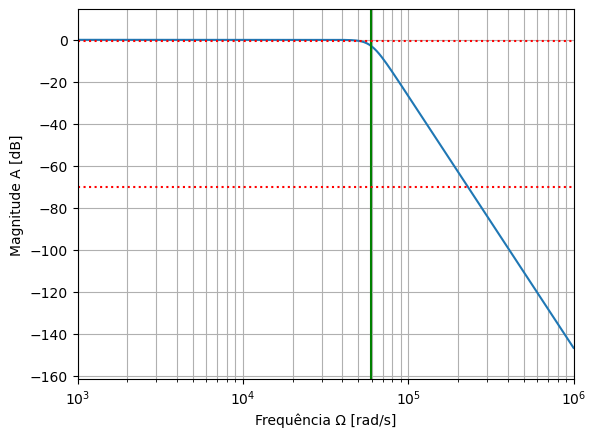

In [6]:
plt.semilogx(w, mag_pj)
#plt.title('Butterworth filter frequency response')
plt.xlabel('Frequência Ω [rad/s]')
plt.ylabel('Magnitude A [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # frequência de corte
plt.axhline(y = -0.5, color = 'r', linestyle = ':')
plt.axhline(y = -70, color = 'r', linestyle = ':') 
plt.show()

## Projeto do Circuito

In [7]:
sos = butter(N, Wn,  btype='low', analog=True, output='sos') # Representação das seções de segunda ordem do filtro

In [8]:
for i, bqd  in enumerate(sos):
    print(f" Biquada {i+1}: {bqd}\n")

 Biquada 1: [0.00000000e+00 0.00000000e+00 4.61749435e+28 1.00000000e+00
 1.15711050e+05 3.58758438e+09]

 Biquada 2: [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 8.47063679e+04 3.58758438e+09]

 Biquada 3: [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 3.10046825e+04 3.58758438e+09]



### Biquad 1

In [9]:
a2_b1 = sos[0][4] # coeficiente 2: wo/Q
a3_b1 = sos[0][5] # coeficiente 3: wo²

R_b1 = 1.5e3
c1_b1 = 2/(a2_b1 * R_b1)
c2_b1 = 1/(pow(R_b1, 2) * c1_b1 * a3_b1) 

print(f"Biquad 1: R1 = R2 = {R_b1}, C1 = {c1_b1} e C2 = {c2_b1}")

Biquad 1: R1 = R2 = 1500.0, C1 = 1.1522955925845477e-08 e C2 = 1.075106424215805e-08


### Biquad 2

In [10]:
a2_b2 = sos[1][4] # coeficiente 2: wo/Q
a3_b2 = sos[1][5] # coeficiente 3: wo²

R_b2 = 6.2e3
c1_b2 = 2/(a2_b2 * R_b2)
c2_b2 = 1/(pow(R_b2, 2) * c1_b2 * a3_b2) 

print(f"Biquad 2: R1 = R2 = {R_b2}, C1 = {c1_b2} e C2 = {c2_b2}")

Biquad 2: R1 = R2 = 6200.0, C1 = 3.808221900337102e-09 e C2 = 1.9041109501685515e-09


### Biquad 3

In [11]:
a2_b3 = sos[2][4] # coeficiente 2: wo/Q
a3_b3 = sos[2][5] # coeficiente 3: wo²

R_b3 = 2.0e3
c1_b3 = 2/(a2_b3 * R_b3)
c2_b3 = 1/(pow(R_b3, 2) * c1_b3 * a3_b3) 

print(f"Biquad 3: R1 = R2 = {R_b3}, C1 = {c1_b3} e C2 = {c2_b3}")

Biquad 3: R1 = R2 = 2000.0, C1 = 3.225319272647412e-08 e C2 = 2.1605542360960287e-09


## Filtro LT Spice

### Importando dados

In [12]:
data = pd.read_csv(r".\Circuitos LT Spice\Filtro Passa Baixa\filtro_passa_baixa_gabriel_mendes.txt", delimiter="\t")

### Conversão do parâmetros

In [13]:
mag_sim = []
for i in data["V(filtroout)"]:
    A = np.sqrt(pow(float(i.split(',')[0]), 2) + pow(float(i.split(',')[1]), 2)) # converte de retangular para magnitude
    mag_sim.append(20*np.log10(A))

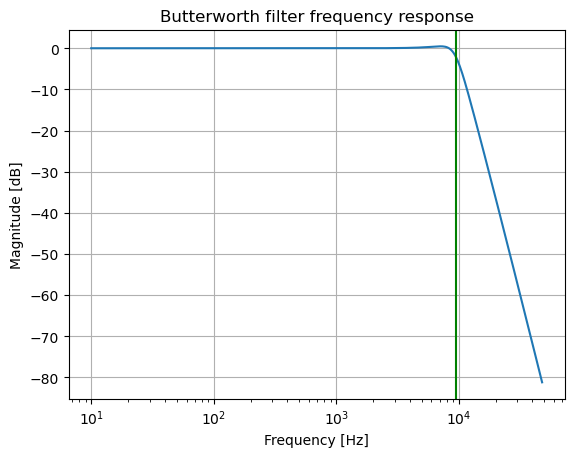

In [14]:
plt.semilogx(data["Freq."], mag_sim) 
plt.xscale('log')
plt.title('Butterworth filter frequency response') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude [dB]')
plt.axvline(Wn/(2*(np.pi)), color='green') # frequência de corte
plt.grid()
plt.show()

## Teórico x Simulado

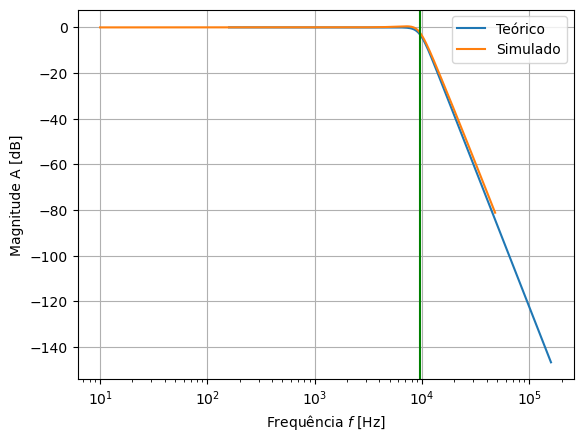

In [15]:
plt.semilogx(frq, mag_pj, label='Teórico')
plt.semilogx(data["Freq."], mag_sim, label='Simulado') 
plt.xscale('log')
#plt.title('Butterworth filter frequency response') 
plt.xlabel('Frequência $f$ [Hz]') 
plt.ylabel('Magnitude A [dB]')
plt.axvline(Wn/(2*(np.pi)), color='green') # frequência de corte
plt.legend()
plt.grid()
plt.show()